In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Timedelta

import pyaw.zh1
import zh1

In [47]:
fp_efd = r"\\Diskstation1\file_three\aw\zh1\efd\ulf\201911\CSES_01_EFD_1_L02_A1_096790_20191031_233350_20191101_000824_000.h5"
efd = pyaw.zh1.EFDULF(fp_efd)

In [48]:
A111_W = efd.dfs['A111_W'].iloc[0,:]
A111_P = efd.dfs['A111_P'].iloc[0,:]

In [49]:
from pyaw import utils_spectral

In [50]:
psd_efd = utils_spectral.PSD(A111_W,fs=125)

In [51]:
freqs_efd, Pxx_efd = psd_efd.get_psd()

In [52]:
Pxx_efd_sqrt = np.sqrt(Pxx_efd)

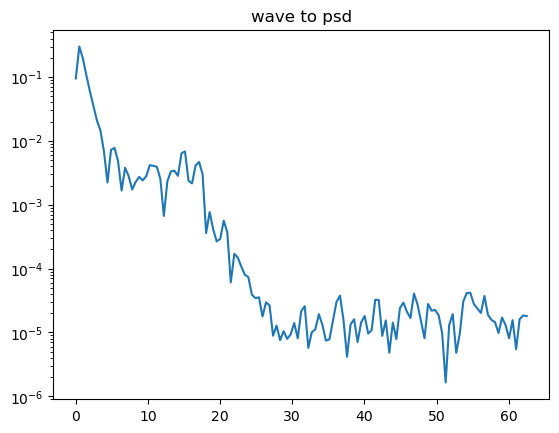

In [53]:
plt.figure()
plt.plot(freqs_efd,Pxx_efd_sqrt)
plt.yscale('log')
plt.title('wave to psd')
plt.show()

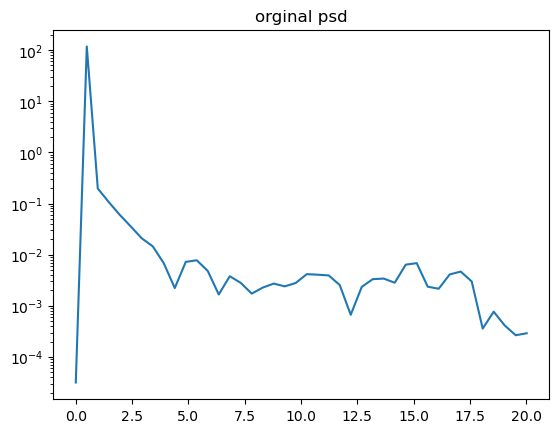

In [54]:
plt.figure()
plt.plot(efd.dfs['FREQ'],A111_P)
plt.yscale('log')
plt.title('orginal psd')
plt.show()

# scm

In [55]:
fp = r"\\Diskstation1\file_three\aw\zh1\scm\ulf\201911\CSES_01_SCM_1_L02_A2_096790_20191031_233256_20191101_000821_000.h5"
scm = pyaw.zh1.SCMULF(fp)

In [56]:
A231_W = scm.dfs['A231_W'].iloc[0,:]
A231_P = scm.dfs['A231_P'].iloc[0,:]

In [57]:
psd_scm = utils_spectral.PSD(A231_W,fs=1024,nperseg=4096)

In [58]:
freqs_scm, Pxx_scm = psd_scm.get_psd()

In [59]:
Pxx_scm_sqrt = np.sqrt(Pxx_scm)

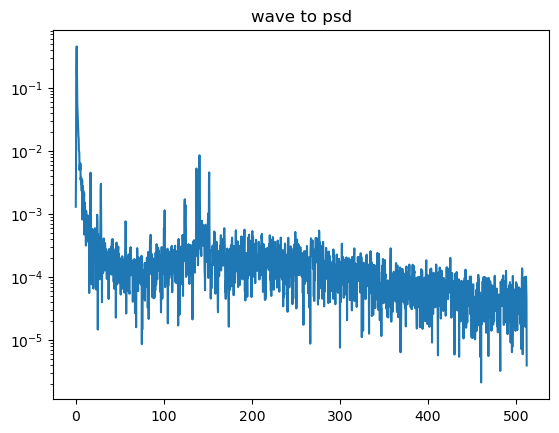

In [60]:
plt.figure()
plt.plot(freqs_scm,Pxx_scm_sqrt)
plt.yscale('log')
plt.title('wave to psd')
plt.show()

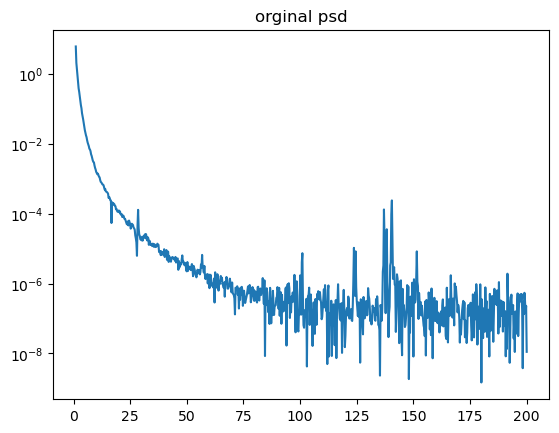

In [61]:
plt.figure()
plt.plot(scm.dfs['FREQ'],A231_P)
plt.yscale('log')
plt.title('orginal psd')
plt.show()

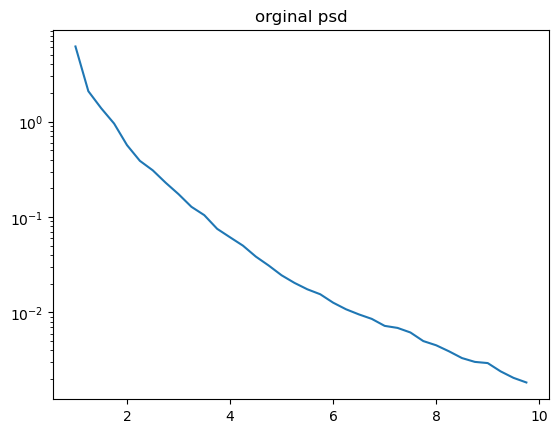

In [62]:
plt.figure()
plt.plot(scm.dfs['FREQ'].iloc[:36,:],A231_P.iloc[:36])
plt.yscale('log')
plt.title('orginal psd')
plt.show()

# 拼接

## efd

In [63]:
efd.datetime.diff()

0                        NaT
1     0 days 00:00:02.049000
2     0 days 00:00:02.047000
3     0 days 00:00:02.049000
4     0 days 00:00:02.048000
               ...          
991   0 days 00:00:02.047000
992   0 days 00:00:02.049000
993   0 days 00:00:02.047000
994   0 days 00:00:02.048000
995   0 days 00:00:02.049000
Name: 0, Length: 996, dtype: timedelta64[ns]

In [77]:
A111_W = efd.dfs['A111_W'].iloc[:6,:]
A111_P = efd.dfs['A111_P'].iloc[:6,:]

In [79]:
A111_W = pd.Series(A111_W.values.flatten())

In [80]:
psd_efd = utils_spectral.PSD(A111_W,fs=125,nperseg=500)

In [81]:
freqs_efd, Pxx_efd = psd_efd.get_psd()

In [82]:
Pxx_efd_sqrt = np.sqrt(Pxx_efd)

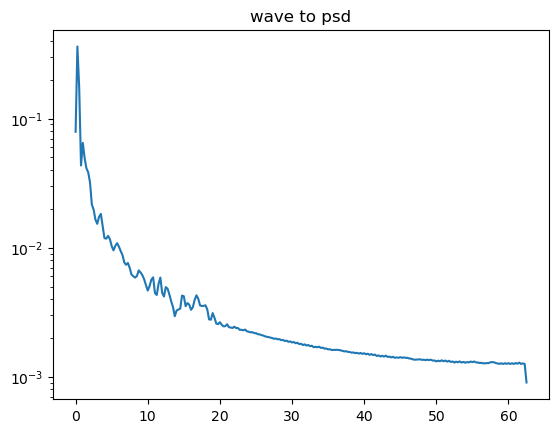

In [83]:
plt.figure()
plt.plot(freqs_efd,Pxx_efd_sqrt)
plt.yscale('log')
plt.title('wave to psd')
plt.show()

## scm

In [70]:
scm.datetime.diff()

0                        NaT
1     0 days 00:00:04.004000
2     0 days 00:00:04.003000
3     0 days 00:00:04.004000
4     0 days 00:00:07.288000
               ...          
511   0 days 00:00:04.003000
512   0 days 00:00:04.004000
513   0 days 00:00:04.004000
514   0 days 00:00:04.005000
515   0 days 00:00:04.003000
Name: 0, Length: 516, dtype: timedelta64[ns]

In [84]:
A231_W = scm.dfs['A231_W'].iloc[:4,:]
A231_P = scm.dfs['A231_P'].iloc[:4,:]

In [85]:
A231_W = pd.Series(A231_W.values.flatten())

In [86]:
psd_scm = utils_spectral.PSD(A231_W,fs=1024,nperseg=4096)

In [87]:
freqs_scm, Pxx_scm = psd_scm.get_psd()

In [75]:
Pxx_scm_sqrt = np.sqrt(Pxx_scm)

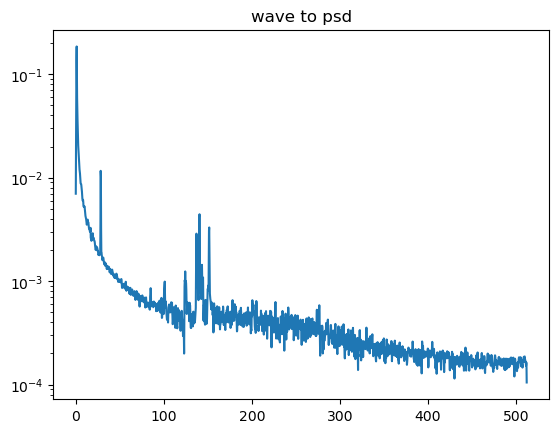

In [76]:
plt.figure()
plt.plot(freqs_scm,Pxx_scm_sqrt)
plt.yscale('log')
plt.title('wave to psd')
plt.show()

In [88]:
assert all(freqs_efd[:40] == freqs_scm[:40])

In [89]:
freqs = freqs_efd[:40]
Pxx_efd_sqrt_clip = Pxx_efd_sqrt[:40]
Pxx_scm_sqrt_clip = Pxx_scm_sqrt[:40]

In [91]:
ratio = Pxx_efd_sqrt_clip / Pxx_scm_sqrt_clip * 1e6

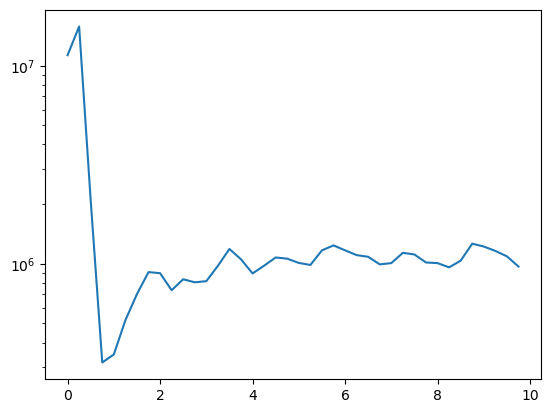

In [94]:
plt.figure()
plt.plot(freqs,ratio)
plt.yscale('log')
plt.show()

# compare

In [98]:
A231_W = scm.dfs['A231_W'].iloc[254:258,:]
A231_P = scm.dfs['A231_P'].iloc[254:258,:]

In [99]:
A231_W = pd.Series(A231_W.values.flatten())

In [100]:
psd_scm = utils_spectral.PSD(A231_W,fs=1024,nperseg=4096)

In [101]:
freqs_scm, Pxx_scm = psd_scm.get_psd()

In [102]:
Pxx_scm_sqrt = np.sqrt(Pxx_scm)

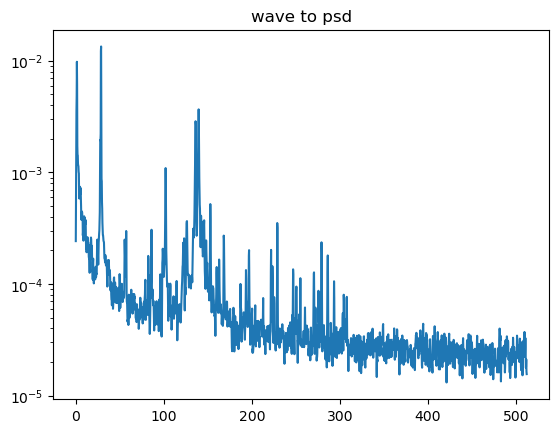

In [109]:
plt.figure()
plt.plot(freqs_scm,Pxx_scm_sqrt)
plt.yscale('log')
plt.title('wave to psd')
plt.show()

In [103]:
A111_W = efd.dfs['A111_W'].iloc[489:497,:]
A111_P = efd.dfs['A111_P'].iloc[489:497,:]

In [104]:
A111_W = pd.Series(A111_W.values.flatten())

In [105]:
psd_efd = utils_spectral.PSD(A111_W,fs=125,nperseg=500)

In [106]:
freqs_efd, Pxx_efd = psd_efd.get_psd()

In [107]:
Pxx_efd_sqrt = np.sqrt(Pxx_efd)

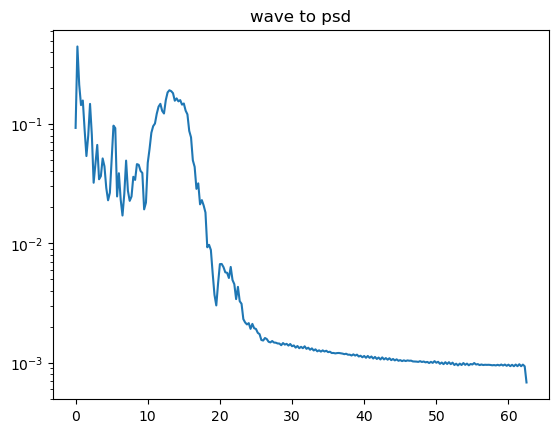

In [108]:
plt.figure()
plt.plot(freqs_efd,Pxx_efd_sqrt)
plt.yscale('log')
plt.title('wave to psd')
plt.show()

In [110]:
assert all(freqs_efd[:40] == freqs_scm[:40])

In [111]:
freqs = freqs_efd[:40]
Pxx_efd_sqrt_clip = Pxx_efd_sqrt[:40]
Pxx_scm_sqrt_clip = Pxx_scm_sqrt[:40]

In [112]:
ratio = Pxx_efd_sqrt_clip / Pxx_scm_sqrt_clip * 1e6

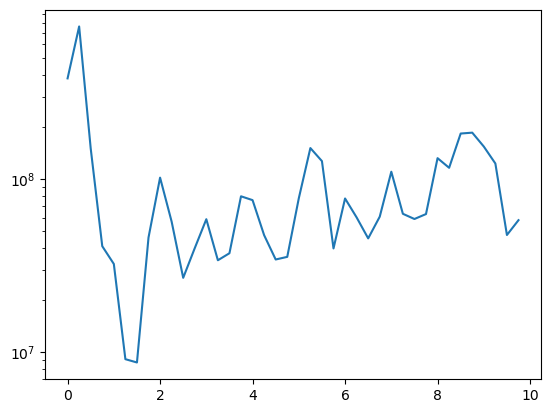

In [113]:
plt.figure()
plt.plot(freqs,ratio)
plt.yscale('log')
plt.show()

In [96]:
cwt_ = utils_spectral.CWT(A111_W,A231_W,sampling_period=0.25)

In [97]:
cwt_.plot_phase_hist_counts()

ValueError: operands could not be broadcast together with shapes (127,1536) (127,16384) 

---

In [22]:
(efd.datetime[1] - efd.datetime[0]) / Timedelta(value=0.008, unit='s')

256.0

In [12]:
# mode
mode = efd.dfs['WORKMODE']
mode  # most is 1 (巡查)

,0
0,1
1,1
2,1
3,1
4,1
...,...
991,1
992,1
993,1
994,1


In [13]:
# A111_W

A111_W = efd.dfs['A111_W']

In [17]:
A111_W.iloc[-1,:]

0      229.169816
1      229.168862
2      229.166791
3      229.163989
4      229.162648
          ...    
251    229.191840
252    229.197621
253    229.203627
254    229.207918
255    229.209989
Name: 995, Length: 256, dtype: float64

In [18]:
# A112_W

A112_W = efd.dfs['A112_W']

In [20]:
A112_W.iloc[1,:]

0      190.126717
1      190.127358
2      190.126732
3      190.126076
4      190.126881
          ...    
251    190.450191
252    190.450028
253    190.452456
254    190.456733
255    190.462768
Name: 1, Length: 256, dtype: float64

In [21]:
# A113_W

A113_W = efd.dfs['A113_W']

In [23]:
A113_W.iloc[-1,:]

0      34.388207
1      34.390088
2      34.390356
3      34.389868
4      34.389932
         ...    
251    34.508467
252    34.504816
253    34.501437
254    34.498952
255    34.497533
Name: 995, Length: 256, dtype: float64

In [67]:
# A111_P

# A111_P = efd.dfs['A111_P']
# i = 1000
# times = efd.datetime_.iloc[:i]
# freqs = efd.dfs['FREQ'].squeeze()
# A111_P = A111_P.iloc[:i,:]
# A111_P = np.sqrt(A111_P)
A111_P = efd.dfs['A113_P']
A111_P = np.sqrt(A111_P)
times = efd.datetime
freqs = efd.dfs['FREQ'].squeeze()

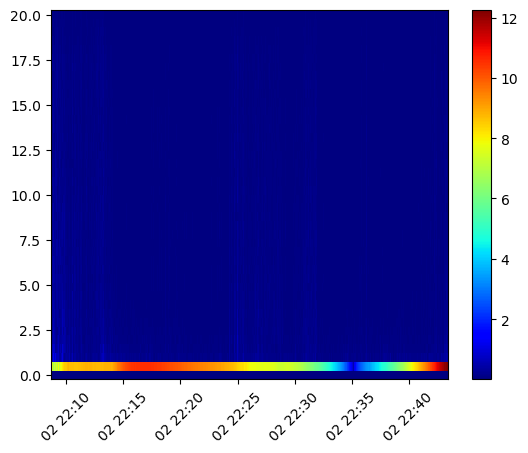

In [68]:
plt.pcolormesh(times, freqs, A111_P.T, shading='auto', cmap='jet')  # pay attention `T`
plt.colorbar()
plt.xticks(rotation=45)
plt.show()

# scm

In [2]:
fp = r"\\Diskstation1\file_three\aw\zh1\scm\ulf\201911\CSES_01_SCM_1_L02_A2_096790_20191031_233256_20191101_000821_000.h5"
scm = pyaw.zh1.SCMULF(fp)

In [6]:
A231_W = scm.dfs['A231_W'].iloc[-1,:]
A231_W

0      -0.032377
1      -0.044872
2      -0.050781
3      -0.053800
4      -0.047498
          ...   
4091   -0.028620
4092   -0.027414
4093   -0.029165
4094   -0.041402
4095   -0.040664
Name: 515, Length: 4096, dtype: float64

In [7]:
A231_P = scm.dfs['A231_P'].iloc[-1,:]
A231_P

0      2.786659e-03
1      7.850641e-03
2      1.009343e-03
3      5.865587e-04
4      9.988294e-05
           ...     
792    2.867193e-06
793    1.080198e-07
794    1.124739e-07
795    1.471162e-09
796    2.263719e-08
Name: 515, Length: 797, dtype: float64

In [10]:
efd.datetime.iloc[0],scm.datetime.iloc[0]

(Timestamp('2019-11-02 22:08:38.726000'),
 Timestamp('2019-10-31 23:33:49.630000'))